In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [14]:
# PARAMETERS

save_to_disk = False # If set to True, figure will be saved to disk. Set to false if you don't want figure to be saved to disk.

In [15]:
#Loading Data

# Load numerical simulation data points: provided to us courtesy of Jacob Shen from the S2023 paper.
data_c_10 = np.genfromtxt(os.path.join('..', 'Data', 'S2023 Fig 3, c=10.dat'), dtype=None, delimiter='') 
data_c_30 = np.genfromtxt(os.path.join('..', 'Data', 'S2023 Fig 3, c=30.dat'), dtype=None, delimiter='')
data_c_100 = np.genfromtxt(os.path.join('..', 'Data', 'S2023 Fig 3, c=100.dat'), dtype=None, delimiter='')

# Load survival fractions computed using the K2021 method
old_method_curve_c_10 = np.load(r"survival_fractions_K2021_c_10_ErrorChecking.npy")
old_method_curve_c_30 = np.load(r"survival_fractions_K2021_c_30_ErrorChecking.npy")
old_method_curve_c_100 = np.load(r"survival_fractions_K2021_c_100_ErrorChecking.npy")

# Load the survival fractions using our switching procedure
switching_methods_curve_c_10 = np.load(r"survival_fractions_switching_c_10_ErrorChecking.npy")
switching_methods_curve_c_30 = np.load(r"survival_fractions_switching_c_30_ErrorChecking.npy")
switching_methods_curve_c_100 = np.load(r"survival_fractions_switching_c_100_ErrorChecking.npy")

# Load the survival fractions computed using S2023 fitting functions
S2022_curve_c_10 = np.load(r"survival_fractions_S2023_c_10_ErrorChecking.npy")
S2022_curve_c_30 = np.load(r"survival_fractions_S2023_c_30_ErrorChecking.npy")
S2022_curve_c_100 = np.load(r"survival_fractions_S2023_c_100_ErrorChecking.npy")

In [16]:
#Computing absolute error between K2021 method and S2023 numerically simulated data
old_method_errors_c_10 = old_method_curve_c_10 - data_c_10[:,1]
old_method_errors_c_30 = old_method_curve_c_30 - data_c_30[:,1]
old_method_errors_c_100 = old_method_curve_c_100 - data_c_100[:,1]

#Computing absolute error between our switching procedure and S2023 numerically simulated data
switching_methods_errors_c_10 = switching_methods_curve_c_10 - data_c_10[:,1]
switching_methods_errors_c_30 = switching_methods_curve_c_30 - data_c_30[:,1]
switching_methods_errors_c_100 = switching_methods_curve_c_100 - data_c_100[:,1]

#Computing absolute error between S2023 fitting functions and S2023 numerically simulated data
S2022_errors_c_10 = S2022_curve_c_10 - data_c_10[:,1]
S2022_errors_c_30 = S2022_curve_c_30 - data_c_30[:,1]
S2022_errors_c_100 = S2022_curve_c_100 - data_c_100[:,1]

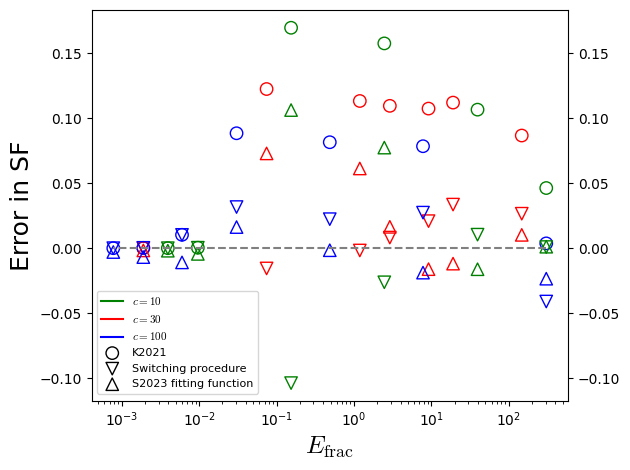

In [17]:
#Plotting the Errors of my curves and S2022's cruves
#LINEAR SCALE

plt.rcParams["mathtext.fontset"] = "cm"


plt.plot(data_c_100[:,0], np.zeros(np.size(data_c_100[:,0])), color="grey", linestyle="dashed")

plt.scatter(data_c_10[:,0], old_method_errors_c_10, 80*np.ones(np.size(data_c_10[:,0])), color="green", facecolors='none')
plt.scatter(data_c_30[:,0], old_method_errors_c_30, 80*np.ones(np.size(data_c_30[:,0])), color="red", facecolors='none')
plt.scatter(data_c_100[:,0], old_method_errors_c_100, 80*np.ones(np.size(data_c_100[:,0])), color="blue", facecolors='none')

plt.scatter(data_c_10[:,0], switching_methods_errors_c_10, 80*np.ones(np.size(data_c_10[:,0])), color="green", facecolors='none', marker="v")
plt.scatter(data_c_30[:,0], switching_methods_errors_c_30, 80*np.ones(np.size(data_c_30[:,0])), color="red", facecolors='none', marker="v")
plt.scatter(data_c_100[:,0], switching_methods_errors_c_100, 80*np.ones(np.size(data_c_100[:,0])), color="blue", facecolors='none', marker="v")

plt.scatter(data_c_10[:,0], S2022_errors_c_10, 80*np.ones(np.size(data_c_10[:,0])), color="green", facecolors='none', marker="^")
plt.scatter(data_c_30[:,0], S2022_errors_c_30, 80*np.ones(np.size(data_c_30[:,0])), color="red", facecolors='none', marker="^")
plt.scatter(data_c_100[:,0], S2022_errors_c_100, 80*np.ones(np.size(data_c_100[:,0])), color="blue", facecolors='none', marker="^")

plt.plot([], [], color="green", label=r"$c=10$")
plt.plot([], [], color="red", label=r"$c=30$")
plt.plot([], [], color="blue", label=r"$c=100$")
plt.scatter([], [], 80*np.ones(1), color="black", facecolors='none', label=r"K2021")
plt.scatter([], [], 80*np.ones(1), color="black", marker="v", facecolors='none', label=r"Switching procedure")
plt.scatter([], [], 80*np.ones(1), color="black", marker="^", facecolors='none', label=r"S2023 fitting function")

plt.xscale("log")

plt.tick_params(labelright=True, right=True)
plt.xlabel(r"$E_{\rm frac}$", fontsize=18)
plt.ylabel(r"Error in SF", fontsize=18)
plt.legend(bbox_to_anchor=(0.18,0.15), loc="center", fontsize = 8)
plt.tight_layout()
if save_to_disk:
    plt.savefig("Figure (7).pdf")
plt.show()